In [1]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import cartopy.feature as cf
import cartopy.crs as ccrs
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter)

In [2]:
ibtracs_dir = '../../data/ibtracs/filtered/'
ibtracs_fname = 'ibtracs_main-tracks_6h_1980-2021_TS-NR-ET-MX-SS-DS'
ibtracs_src = os.path.join(ibtracs_dir, ibtracs_fname+'.csv')
ibtracs = pd.read_csv(ibtracs_src, header=0, index_col=0, keep_default_na=False)
ibtracs_img_dir = os.path.join(ibtracs_dir,'img')
os.makedirs(ibtracs_img_dir, exist_ok=True)

In [3]:
basins = sorted(list(ibtracs['BASIN'].unique()))
basins

['EP', 'NA', 'WP']

In [4]:
basin_names = {
    'EP' : 'East North Pacific', 
    'NA' : 'North Atlantic', 
    'WP' : 'West North Pacific'
}

In [5]:
ibtracs['LON'].max(), ibtracs['LON'].min(), ibtracs['LAT'].max(), ibtracs['LAT'].min()

(320.0, 100.0, 69.0, 0.1)

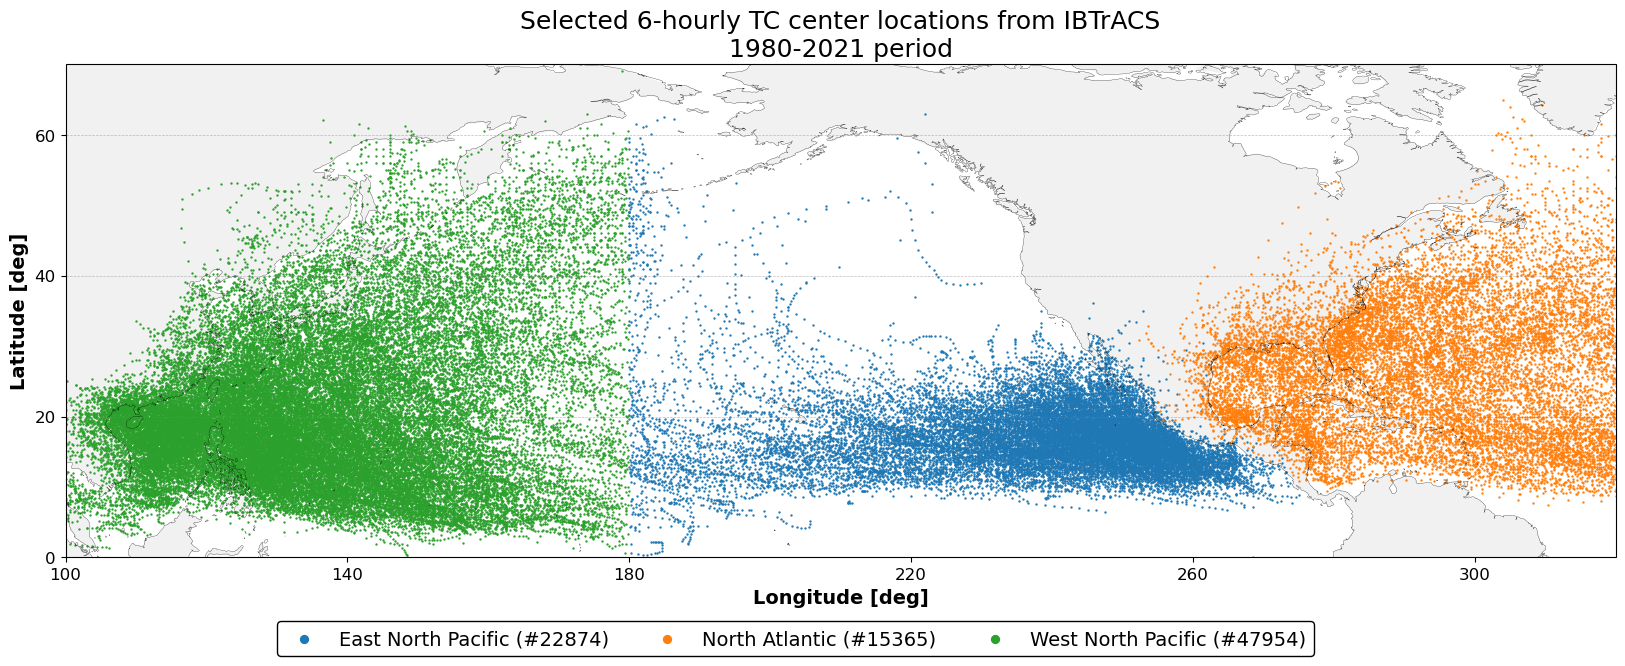

In [6]:
# set map extent
lon_range = (100,320)
lat_range = (0,70)
central_longitude = (lon_range[1] - lon_range[0])

fig = plt.figure(figsize=(25,10))
proj = ccrs.PlateCarree(central_longitude=central_longitude)
ax = plt.axes(projection=proj)

image_extent = [lon_range[0], lon_range[1], lat_range[0], lat_range[1]]
ax.set_extent(image_extent, crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m', lw=0.2)
ax.add_feature(cf.LAND, facecolor='lightgrey', alpha=0.3)

fontdict = {'weight':'bold', 'size':14}
title_fontdict = {'size':18}
ticksize = 12

# plot tracks in each basin
alpha = 1.0
marker_size = 0.5

for basin in basins:
    lat_val = ibtracs[ibtracs['BASIN']==basin]['LAT'].to_numpy()
    lon_val = ibtracs[ibtracs['BASIN']==basin]['LON'].to_numpy()
    ax.scatter(lon_val, lat_val, s=marker_size, marker='o', alpha=alpha, transform=ccrs.Geodetic(), label=f'{basin_names[basin]} (#{lat_val.shape[0]})')

# x-axis
longitudes = np.arange(lon_range[0], lon_range[1]+1, 40)
lon_formatter = LongitudeFormatter(zero_direction_label=False)
ax.xaxis.set_major_formatter(lon_formatter)
ax.xaxis.set_major_locator(mticker.FixedLocator(longitudes-central_longitude))
ax.set_xticklabels(longitudes, size=ticksize)
ax.set_xticks(longitudes-central_longitude)
ax.set_xlabel('Longitude [deg]', fontdict=fontdict)

# y-axis
latitudes = np.arange(lat_range[0], lat_range[1]+1, 20)
lat_formatter = LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
ax.yaxis.set_major_locator(mticker.FixedLocator(latitudes))
ax.set_yticklabels(latitudes, size=ticksize)
ax.set_yticks(latitudes)
ax.set_ylabel('Latitude [deg]', fontdict=fontdict)

ax.set_title("Selected 6-hourly TC center locations from IBTrACS\n1980-2021 period", fontdict=title_fontdict)

# gridlines
gl = ax.gridlines(crs=proj, draw_labels=False, dms=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator(longitudes-central_longitude)
gl.ylocator = mticker.FixedLocator(latitudes)
gl.xlines = True
gl.ylines = True

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='upper left', markerscale=8, edgecolor='black', framealpha=1, ncol=4, fontsize=14, bbox_to_anchor=(0.13,-0.11))

plt.savefig(os.path.join(ibtracs_img_dir, ibtracs_fname+'.png'), dpi=300, bbox_inches='tight')
plt.show()